# Monthly Climatology of absolute LAI (for illustration)

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from lib_ploting import plotMap_withBorders, savefigure, labels

In [2]:
# load the data
dir_root = "/home/julie_andre/PycharmProjects/Damocles_Project3/data/GlobMap_LAI/europe/"# depending on your computer
dir_save_fig = "/home/julie_andre/PycharmProjects/Damocles_Project3/plots/"
nc_name =  "GLOBMAP_LAI.monthly.1982-2020_europe_025deg.nc"
nc_path = dir_root + nc_name

var_name = "GLOBMAP_LAI"
data = xr.open_dataset(nc_path)[var_name]
print(data)

<xarray.DataArray 'GLOBMAP_LAI' (time: 468, latitude: 200, longitude: 220)>
[20592000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2020-12-31
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 44.38 44.62 44.88
  * latitude   (latitude) float64 74.88 74.62 74.38 74.12 ... 25.62 25.38 25.12
Attributes:
    long_name:  GLOBMAP_LAI
    units:      %


## Select three interesting pixel and plot their location

The figure has been saved


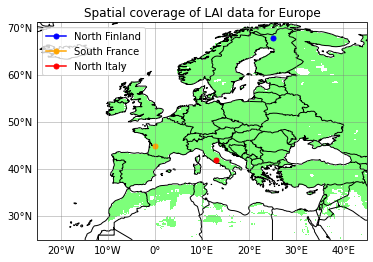

In [5]:
map_LAI_extend = data[0].copy()
plotMap_withBorders(map_LAI_extend, add_colorbar=False, plot_gridlines_labels=True, label = "LAI data coverage")
lon, lat = 25, 68
plt.plot(lon, lat, color= 'b', marker='o', markersize=5, label = "North Finland")

lon, lat = 0, 45
plt.plot(lon, lat, color= 'Orange', marker='o', markersize=5, label = "South France")

lon, lat = 13, 42
plt.plot(lon, lat, color= 'r', marker='o', markersize=5, label = "North Italy")

plt.legend()
plt.title("Spatial coverage of LAI data for Europe")

fig_path = dir_save_fig + "LAI_loc_3pixels.png"
savefigure(fig_path)

Check the land cover.

In [3]:
nc_path = "/home/julie_andre/PycharmProjects/Damocles_Project3/data/data_preprocessed/regridded_LU_2018.nc"
land_cover = xr.open_dataset(nc_path)
print(land_cover)

<xarray.Dataset>
Dimensions:                     (lat: 200, lon: 220)
Coordinates:
  * lat                         (lat) float64 25.12 25.38 25.62 ... 74.62 74.88
  * lon                         (lon) float64 -9.875 -9.625 ... 44.62 44.88
Data variables: (12/19)
    majority_class_1            (lat, lon) float64 ...
    majority_class_2            (lat, lon) float64 ...
    majority_class_3            (lat, lon) float64 ...
    Tree_Broadleaf_Evergreen    (lat, lon) float64 ...
    Tree_Broadleaf_Deciduous    (lat, lon) float64 ...
    Tree_Needleleaf_Evergreen   (lat, lon) float64 ...
    ...                          ...
    Bare_soil                   (lat, lon) float64 ...
    Water                       (lat, lon) float64 ...
    Snow_Ice                    (lat, lon) float64 ...
    Urban                       (lat, lon) float64 ...
    NoData                      (lat, lon) float64 ...
    change_count                (lat, lon) float64 ...


In [16]:
# checking land cover for France.
lon, lat = 0, 45
land_cover_pixel = land_cover.sel(lat=lat, lon=lon, method="nearest")
print([land_cover_pixel[var].values for var in land_cover_pixel.variables])

[array(45.125), array(0.125), array(42.56635629), array(45.6041417), array(46.71158855), array(0.01202211), array(0.09686152), array(0.05997156), array(0.02402144), array(0.01815269), array(0.03005708), array(0.01815269), array(0.), array(0.18917918), array(0.54662207), array(0.), array(0.0009867), array(0.), array(0.0022177), array(0.), array(0.)]


## Do the monthly climatology for those locations

The figure has been saved


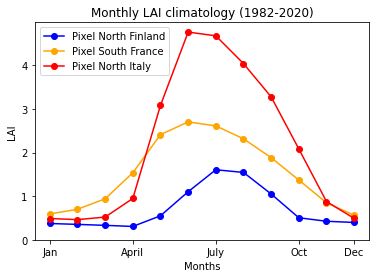

In [23]:
lon, lat = 25, 68
pixel_name = "North Finland"
lon_pixel = [25, 0, 13]
lat_pixel = [68, 45, 42]
pixel_names = ["North Finland", "South France", "North Italy"]
colors = ['b', 'Orange', 'r']


for lon, lat, pixel_name, color in zip(lon_pixel, lat_pixel, pixel_names, colors):
    data_pixel = data.sel(latitude = lat, longitude = lon, method="nearest")

    data_climato = data_pixel.groupby("time.month").mean("time")
    plt.plot(np.arange(1, 12+1), data_climato, marker = "o", color = color, label = f"Pixel {pixel_name}")

plt.legend()
plt.xticks([1, 4, 7, 10, 12], ['Jan', 'April', 'July', 'Oct', 'Dec'])
plt.ylim(0)
labels('Months', "LAI" , f'Monthly LAI climatology (1982-2020)')

fig_path = dir_save_fig + "LAI_climatology_3pixels.png"
savefigure(fig_path)

The figure has been saved


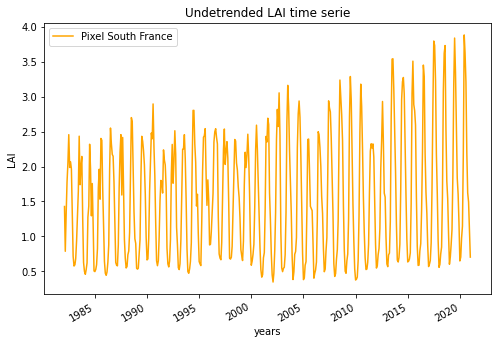

In [29]:
# LAI for France Landes
lon, lat = 0, 45
data_pixel = data.sel(latitude = lat, longitude = lon, method="nearest")
plt.figure(figsize=(8, 5))
data_pixel.plot(color='Orange', label= "Pixel South France")
plt.legend()
labels("years", "LAI",  "Undetrended LAI time serie")


fig_path = dir_save_fig + "LAI_france_pixel_time_serie.png"
savefigure(fig_path)

In [ ]:
# comparing


Here we see a strong trend in detrend LAI

## Check the LAI detrended.

Now we use the data from seasonal LAI.

In [30]:
# load data
dir_root = "/home/julie_andre/PycharmProjects/Damocles_Project3/data/data_preprocessed/"# depending on your computer

var_name_path = "lai"
var_name = "GLOBMAP_LAI"
nc_path = f"{dir_root}aggregated_{var_name_path}.nc"
data = xr.open_dataset(nc_path)[var_name]
print(data)

<xarray.DataArray 'GLOBMAP_LAI' (time: 157, latitude: 200, longitude: 220)>
[6908000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1981-12-01 1982-03-01 ... 2020-12-01
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 44.38 44.62 44.88
  * latitude   (latitude) float64 74.88 74.62 74.38 74.12 ... 25.62 25.38 25.12


<xarray.DataArray 'GLOBMAP_LAI' (time: 39)>
array([-1.104474, -1.964138, -3.704678, -1.40017 , -0.160689, -1.446461,
        0.102818, -0.418215,  0.797977, -2.853032, -1.879466, -1.190432,
       -0.60323 , -1.426223,  0.100791, -1.817508, -2.731138, -1.904162,
       -2.503224,  0.26129 ,  2.090945,  1.10474 ,  1.681507, -4.889609,
       -2.499517,  0.434378,  2.548996,  1.095001,  0.644092, -2.318744,
       -0.764098,  5.005017,  3.507081,  2.474982,  1.518998,  6.010294,
        3.634345,  3.178194,  1.387762])
Coordinates:
  * time       (time) datetime64[ns] 1982-06-01 1983-06-01 ... 2020-06-01
    longitude  float64 0.125
    latitude   float64 45.12
The figure has been saved


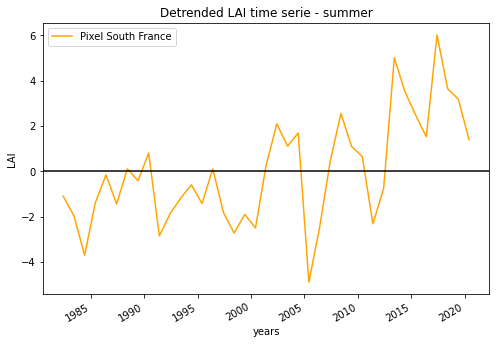

In [41]:
# LAI for France Landes
lon, lat = 0, 45
data_pixel = data.sel(latitude = lat, longitude = lon, method="nearest").groupby("time.season")['JJA']
print(data_pixel)

plt.figure(figsize=(8, 5))
data_pixel.plot(color='Orange', label= "Pixel South France")
plt.legend()
plt.axhline(y=0, color='k')
labels("years", "LAI",  "Detrended LAI time serie - summer")


fig_path = dir_save_fig + "LAI_france_pixel_time_serie_detrended_summer.png"
savefigure(fig_path)